Data Collection and Preprocessing:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
covid_data = pd.read_csv(url)

In [3]:
covid_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [4]:
covid_data.shape

(289, 1147)

In [5]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1147 entries, Province/State to 3/9/23
dtypes: float64(2), int64(1143), object(2)
memory usage: 2.5+ MB


In [6]:
covid_data.isnull().sum()

Province/State    198
Country/Region      0
Lat                 2
Long                2
1/22/20             0
                 ... 
3/5/23              0
3/6/23              0
3/7/23              0
3/8/23              0
3/9/23              0
Length: 1147, dtype: int64

In [7]:
covid_data.fillna(0, inplace=True)

In [8]:
covid_data.isnull().sum()

Province/State    0
Country/Region    0
Lat               0
Long              0
1/22/20           0
                 ..
3/5/23            0
3/6/23            0
3/7/23            0
3/8/23            0
3/9/23            0
Length: 1147, dtype: int64

In [9]:
covid_data.rename(columns={"Country/Region": "Country", "Province/State": "Province"}, inplace=True)

In [10]:
covid_data.head()

,Province,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,0,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,0,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,0,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,0,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,0,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [11]:
covid_data.drop(columns=["Province"], inplace=True)

In [12]:
covid_data.head()

,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,Albania,41.15330,20.168300,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [13]:
covid_data_long = covid_data.melt(id_vars=["Country", "Lat", "Long"], var_name="Date", value_name="Confirmed")

In [14]:
covid_data_long.head()

,Country,Lat,Long,Date,Confirmed
0,Afghanistan,33.93911,67.709953,1/22/20,0
1,Albania,41.15330,20.168300,1/22/20,0
2,Algeria,28.03390,1.659600,1/22/20,0
3,Andorra,42.50630,1.521800,1/22/20,0
4,Angola,-11.20270,17.873900,1/22/20,0


In [15]:
covid_data_long["Date"] = pd.to_datetime(covid_data_long["Date"])

<ipython-input-15-513377c89ddb>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  covid_data_long["Date"] = pd.to_datetime(covid_data_long["Date"])


In [16]:
covid_data_long.head()

,Country,Lat,Long,Date,Confirmed
0,Afghanistan,33.93911,67.709953,2020-01-22,0
1,Albania,41.15330,20.168300,2020-01-22,0
2,Algeria,28.03390,1.659600,2020-01-22,0
3,Andorra,42.50630,1.521800,2020-01-22,0
4,Angola,-11.20270,17.873900,2020-01-22,0


In [17]:
covid_data_grouped = covid_data_long.groupby(["Country", "Date"]).sum().reset_index()

In [18]:
covid_data_grouped.head()

,Country,Date,Lat,Long,Confirmed
0,Afghanistan,2020-01-22,33.93911,67.709953,0
1,Afghanistan,2020-01-23,33.93911,67.709953,0
2,Afghanistan,2020-01-24,33.93911,67.709953,0
3,Afghanistan,2020-01-25,33.93911,67.709953,0
4,Afghanistan,2020-01-26,33.93911,67.709953,0


In [19]:
covid_data_grouped.to_csv("cleaned_covid_data.csv", index=False)

print("Data cleaning and preprocessing completed successfully!")

Data cleaning and preprocessing completed successfully!


Exploratory Data Analysis (EDA):

In [20]:
import pandas as pd

covid_data_grouped = pd.read_csv("cleaned_covid_data.csv")
covid_data_grouped.head()

,Country,Date,Lat,Long,Confirmed
0,Afghanistan,2020-01-22,33.93911,67.709953,0
1,Afghanistan,2020-01-23,33.93911,67.709953,0
2,Afghanistan,2020-01-24,33.93911,67.709953,0
3,Afghanistan,2020-01-25,33.93911,67.709953,0
4,Afghanistan,2020-01-26,33.93911,67.709953,0


In [21]:
covid_data_grouped.describe()

,Lat,Long,Confirmed
count,229743.000000,229743.000000,2.297430e+05
mean,28.155583,31.672925,1.379412e+06
std,98.064743,295.541390,5.810423e+06
min,-256.850200,-1202.597900,0.000000e+00
25%,3.848000,-9.696600,3.831000e+03
50%,17.189900,20.902977,5.293300e+04
75%,40.143100,47.576900,4.995925e+05
max,1085.292300,3688.937700,1.038027e+08


In [22]:
covid_data_grouped['Date'] = pd.to_datetime(covid_data_grouped['Date'])

In [23]:
global_cases = covid_data_grouped.groupby('Date')['Confirmed'].sum().reset_index()

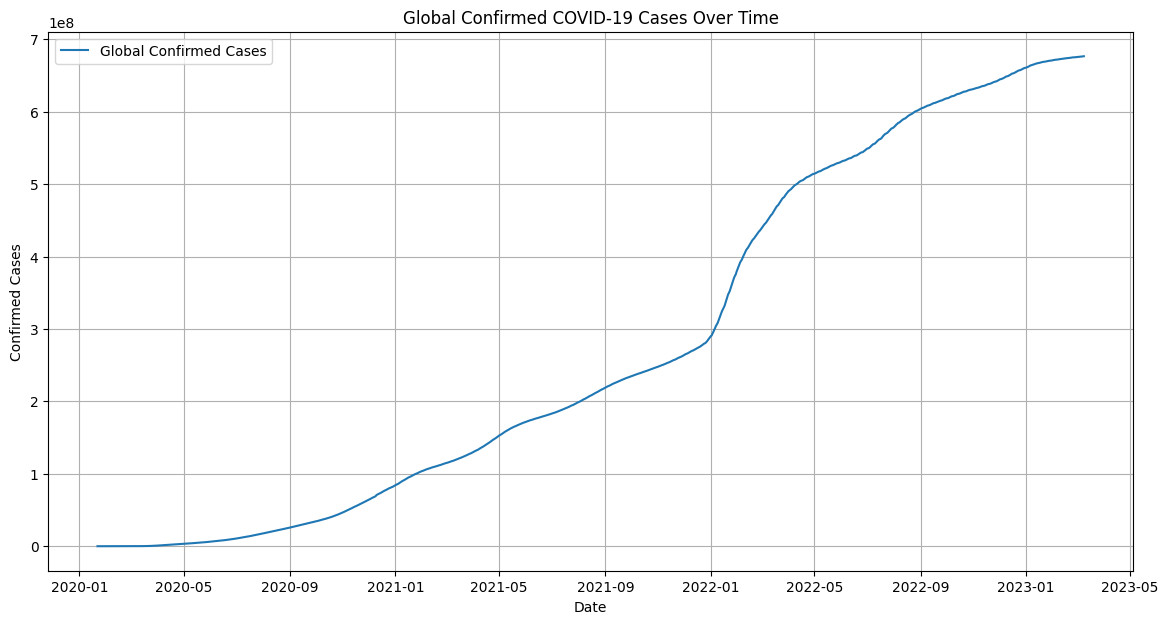

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14, 7))
plt.plot(global_cases['Date'], global_cases['Confirmed'], label='Global Confirmed Cases')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('Global Confirmed COVID-19 Cases Over Time')
plt.legend()
plt.grid(True)
plt.show()

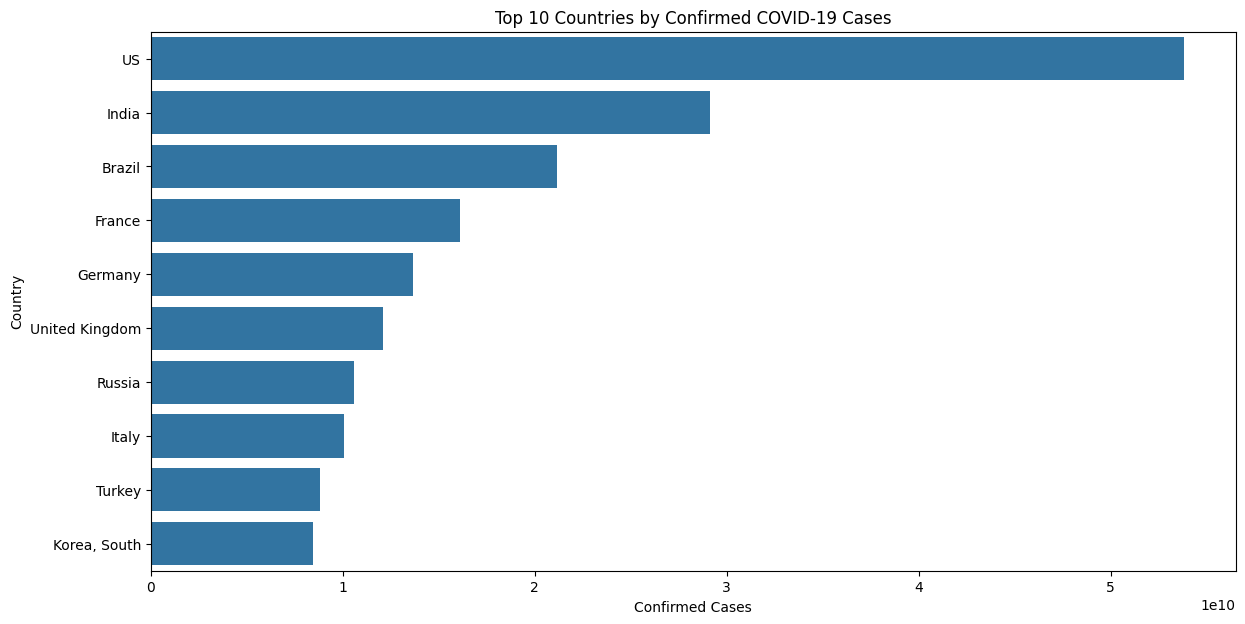

In [25]:
# Plot the total number of confirmed cases by country
top_countries = covid_data_grouped.groupby('Country')['Confirmed'].sum().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(14, 7))
sns.barplot(x='Confirmed', y='Country', data=top_countries)
plt.xlabel('Confirmed Cases')
plt.ylabel('Country')
plt.title('Top 10 Countries by Confirmed COVID-19 Cases')
plt.show()


<ipython-input-26-1e009cf670a4>:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  covid_data_deaths_long["Date"] = pd.to_datetime(covid_data_deaths_long["Date"])
<ipython-input-26-1e009cf670a4>:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  covid_data_recoveries_long["Date"] = pd.to_datetime(covid_data_recoveries_long["Date"])


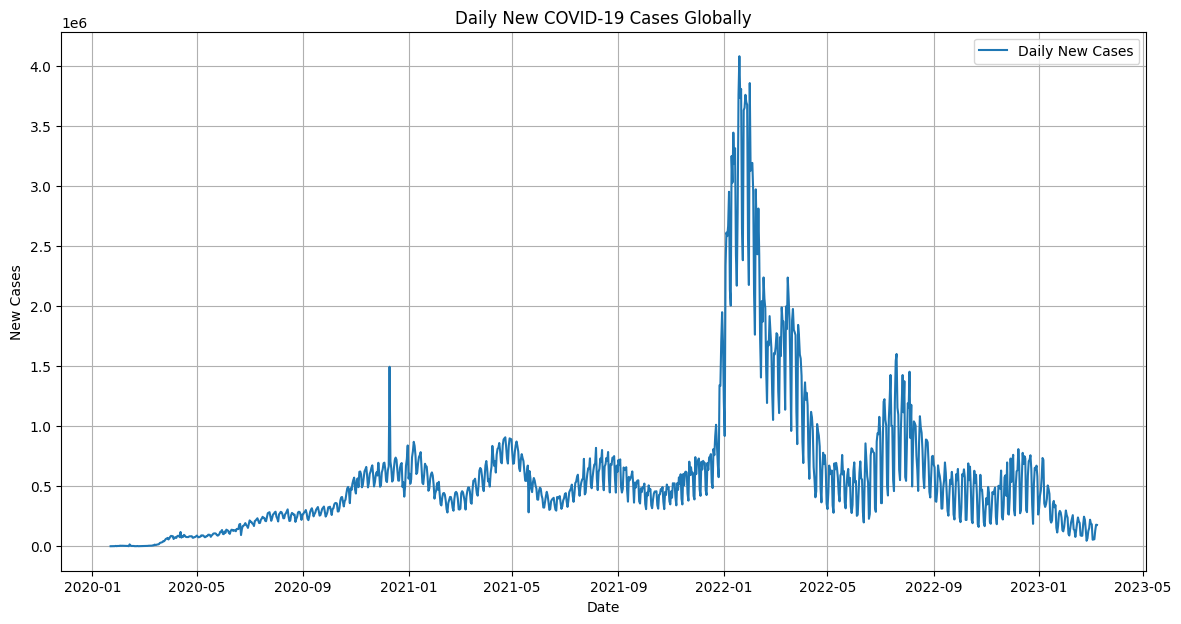

In [26]:
# Load additional data for deaths and recoveries (replace with actual data sources)
url_deaths = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
url_recoveries = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"

covid_data_deaths = pd.read_csv(url_deaths)
covid_data_recoveries = pd.read_csv(url_recoveries)

# Data Cleaning and Transformation for deaths
covid_data_deaths.fillna(0, inplace=True)
covid_data_deaths.rename(columns={"Country/Region": "Country", "Province/State": "Province"}, inplace=True)
covid_data_deaths.drop(columns=["Province"], inplace=True)
covid_data_deaths_long = covid_data_deaths.melt(id_vars=["Country", "Lat", "Long"], var_name="Date", value_name="Deaths")
covid_data_deaths_long["Date"] = pd.to_datetime(covid_data_deaths_long["Date"])
covid_data_deaths_grouped = covid_data_deaths_long.groupby(["Country", "Date"]).sum().reset_index()

# Data Cleaning and Transformation for recoveries
covid_data_recoveries.fillna(0, inplace=True)
covid_data_recoveries.rename(columns={"Country/Region": "Country", "Province/State": "Province"}, inplace=True)
covid_data_recoveries.drop(columns=["Province"], inplace=True)
covid_data_recoveries_long = covid_data_recoveries.melt(id_vars=["Country", "Lat", "Long"], var_name="Date", value_name="Recoveries")
covid_data_recoveries_long["Date"] = pd.to_datetime(covid_data_recoveries_long["Date"])
covid_data_recoveries_grouped = covid_data_recoveries_long.groupby(["Country", "Date"]).sum().reset_index()

# Merge confirmed, deaths, and recoveries data
merged_data = covid_data_grouped.merge(covid_data_deaths_grouped, on=['Country', 'Date', 'Lat', 'Long'], how='left')
merged_data = merged_data.merge(covid_data_recoveries_grouped, on=['Country', 'Date', 'Lat', 'Long'], how='left')
merged_data.fillna(0, inplace=True)

# Calculate daily new cases, deaths, and recoveries
merged_data['New Cases'] = merged_data.groupby('Country')['Confirmed'].diff().fillna(0)
merged_data['New Deaths'] = merged_data.groupby('Country')['Deaths'].diff().fillna(0)
merged_data['New Recoveries'] = merged_data.groupby('Country')['Recoveries'].diff().fillna(0)

# Plot daily new cases globally
global_new_cases = merged_data.groupby('Date')['New Cases'].sum().reset_index()
plt.figure(figsize=(14, 7))
plt.plot(global_new_cases['Date'], global_new_cases['New Cases'], label='Daily New Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.title('Daily New COVID-19 Cases Globally')
plt.legend()
plt.grid(True)
plt.show()


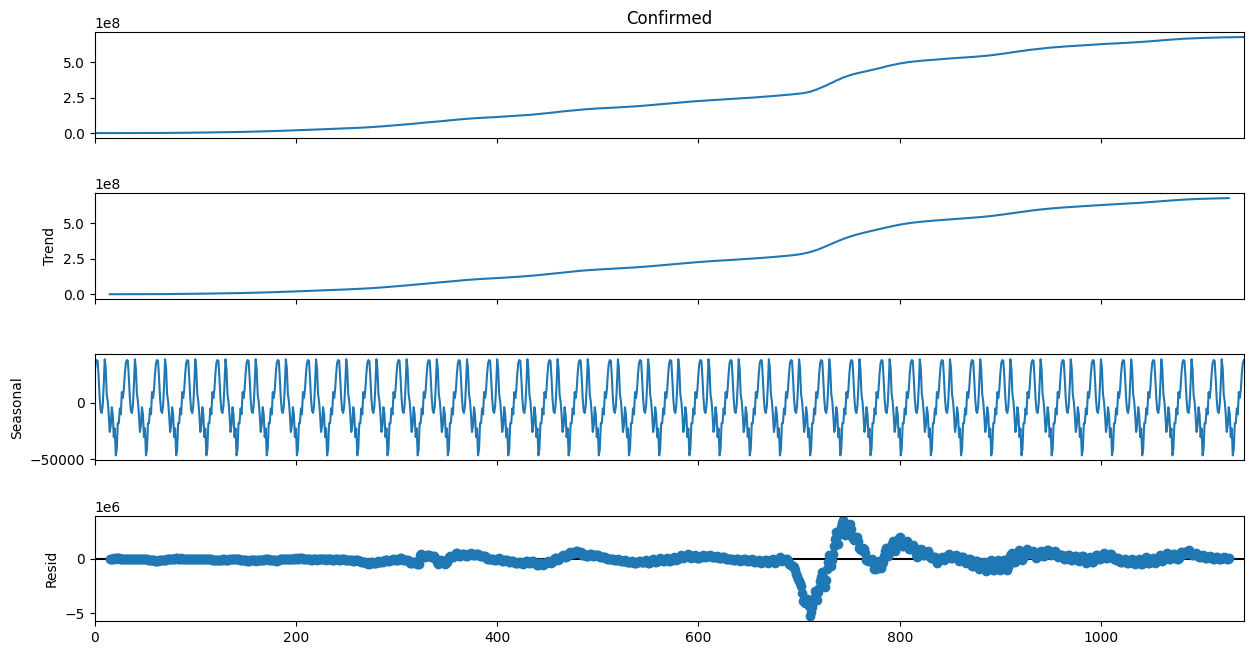

In [27]:
import statsmodels.api as sm

# Decompose the time series to observe trend and seasonality
decomposition = sm.tsa.seasonal_decompose(global_cases['Confirmed'], model='additive', period=30)
fig = decomposition.plot()
fig.set_size_inches(14, 7)
plt.show()


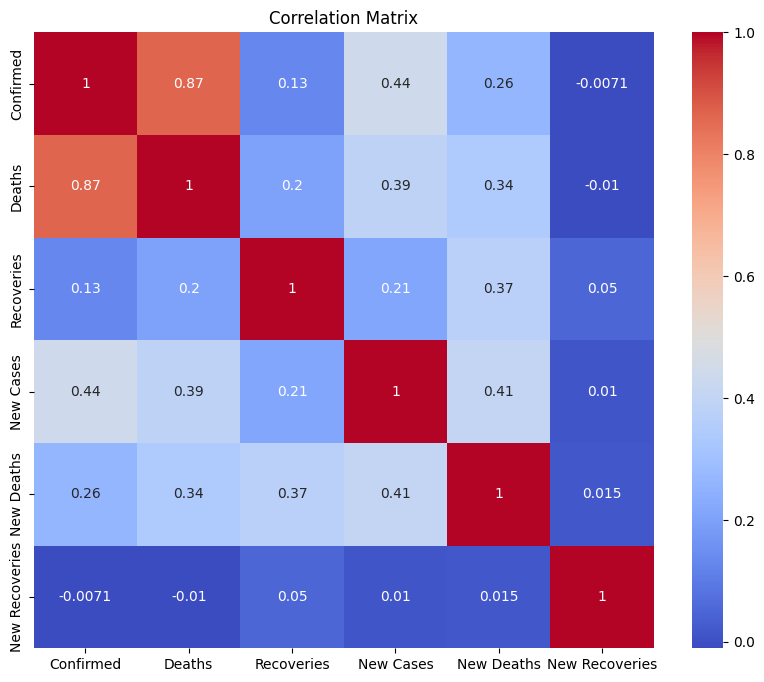

In [28]:
# Calculate correlation matrix
correlation_matrix = merged_data[['Confirmed', 'Deaths', 'Recoveries', 'New Cases', 'New Deaths', 'New Recoveries']].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Feature Engineering:

In [29]:
import pandas as pd

# Load the cleaned data
covid_data = pd.read_csv("cleaned_covid_data.csv")

# Print column names to identify correct names
print(covid_data.columns)


Index(['Country', 'Date', 'Lat', 'Long', 'Confirmed'], dtype='object')


In [30]:

# Convert Date column to datetime
covid_data['Date'] = pd.to_datetime(covid_data['Date'])

# Print column names to identify correct names
print(covid_data.columns)

# Create new features
covid_data['Confirmed_Lag_1'] = covid_data.groupby('Country')['Confirmed'].shift(1).fillna(0)
covid_data['Confirmed_Lag_7'] = covid_data.groupby('Country')['Confirmed'].shift(7).fillna(0)
covid_data['Confirmed_Rolling_Mean_7'] = covid_data.groupby('Country')['Confirmed'].rolling(window=7).mean().reset_index(0, drop=True).fillna(0)
covid_data['Confirmed_Rate_of_Change'] = covid_data.groupby('Country')['Confirmed'].pct_change().fillna(0)
covid_data['Daily_New_Cases'] = covid_data.groupby('Country')['Confirmed'].diff().fillna(0)

# Assuming other columns such as 'Deaths' and 'Recoveries' exist
# If they do not exist, you need to comment out or modify these lines accordingly
# covid_data['Daily_New_Deaths'] = covid_data.groupby('Country')['Deaths'].diff().fillna(0)
# covid_data['Daily_New_Recoveries'] = covid_data.groupby('Country')['Recoveries'].diff().fillna(0)

covid_data['Day_of_Week'] = covid_data['Date'].dt.dayofweek
covid_data['Is_Weekend'] = covid_data['Day_of_Week'].isin([5, 6]).astype(int)

# Display the first few rows of the dataset with new features
covid_data.head()

Index(['Country', 'Date', 'Lat', 'Long', 'Confirmed'], dtype='object')


,Country,Date,Lat,Long,Confirmed,Confirmed_Lag_1,Confirmed_Lag_7,Confirmed_Rolling_Mean_7,Confirmed_Rate_of_Change,Daily_New_Cases,Day_of_Week,Is_Weekend
0,Afghanistan,2020-01-22,33.93911,67.709953,0,0.0,0.0,0.0,0.0,0.0,2,0
1,Afghanistan,2020-01-23,33.93911,67.709953,0,0.0,0.0,0.0,0.0,0.0,3,0
2,Afghanistan,2020-01-24,33.93911,67.709953,0,0.0,0.0,0.0,0.0,0.0,4,0
3,Afghanistan,2020-01-25,33.93911,67.709953,0,0.0,0.0,0.0,0.0,0.0,5,1
4,Afghanistan,2020-01-26,33.93911,67.709953,0,0.0,0.0,0.0,0.0,0.0,6,1


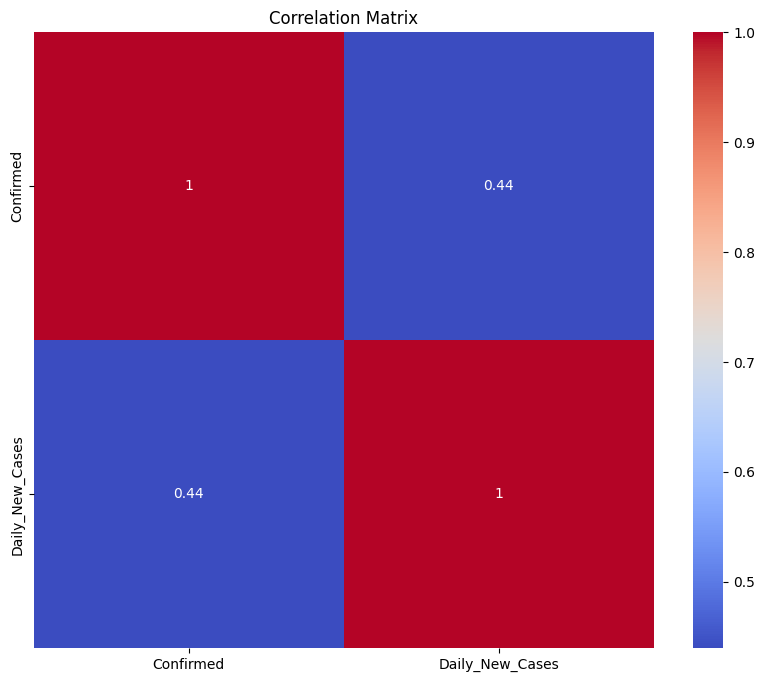

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = covid_data[['Confirmed', 'Daily_New_Cases']].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Model Development:


In [32]:
!pip install pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.6 MB/s eta 0:00:00


In [33]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load and prepare the data
covid_data = pd.read_csv("cleaned_covid_data.csv")
covid_data.dtypes

Country       object
Date          object
Lat          float64
Long         float64
Confirmed      int64
dtype: object

In [34]:
import pandas as pd

# Load the cleaned data
covid_data = pd.read_csv("cleaned_covid_data.csv")

# Print column names to identify correct names
print("Column names:", covid_data.columns)

# Strip any leading/trailing spaces from column names
covid_data.columns = covid_data.columns.str.strip()

# Ensure the 'Deaths' column exists
if 'Deaths' in covid_data.columns:
    # Convert columns to numeric, forcing errors to NaN
    covid_data['Confirmed'] = pd.to_numeric(covid_data['Confirmed'], errors='coerce')
    covid_data['Deaths'] = pd.to_numeric(covid_data['Deaths'], errors='coerce')
    covid_data['Recoveries'] = pd.to_numeric(covid_data['Recoveries'], errors='coerce')

    # Handle missing values
    covid_data = covid_data.fillna(method='ffill')

    # Check for duplicate indices
    covid_data.set_index('Date', inplace=True)
    covid_data = covid_data[~covid_data.index.duplicated(keep='first')]

    # Set frequency to daily and fill missing values
    covid_data = covid_data.asfreq('D', method='ffill')

    # Example of creating a new feature
    covid_data['Daily_New_Cases'] = covid_data['Confirmed'].diff().fillna(0)

    # Print DataFrame after transformation
    print(covid_data.head())
else:
    print("The 'Deaths' column is missing from the dataset.")


Column names: Index(['Country', 'Date', 'Lat', 'Long', 'Confirmed'], dtype='object')
The 'Deaths' column is missing from the dataset.


In [39]:
import pandas as pd

# Load the cleaned data
covid_data = pd.read_csv("cleaned_covid_data.csv")

# Convert Date column to datetime
covid_data['Date'] = pd.to_datetime(covid_data['Date'])

# Check for duplicate entries
duplicates = covid_data[covid_data.duplicated(subset=['Country', 'Date'], keep=False)]
print("Duplicate entries found:\n", duplicates)

# Remove duplicates by taking the mean of duplicates or another aggregation method
covid_data = covid_data.groupby(['Country', 'Date'], as_index=False).agg({
    'Confirmed': 'sum',  # Use appropriate aggregation method
    'Lat': 'mean',
    'Long': 'mean'
})

# Set the Date column as the index
covid_data.set_index('Date', inplace=True)

# Ensure the index is sorted
covid_data.sort_index(inplace=True)



# Create features based on available data
covid_data['Confirmed_Lag_1'] = covid_data['Confirmed'].shift(1).fillna(0)
covid_data['Confirmed_Lag_7'] = covid_data['Confirmed'].shift(7).fillna(0)
covid_data['Confirmed_Rolling_Mean_7'] = covid_data['Confirmed'].rolling(window=7).mean().fillna(0)
covid_data['Confirmed_Rate_of_Change'] = covid_data['Confirmed'].pct_change().fillna(0)
covid_data['Daily_New_Cases'] = covid_data['Confirmed'].diff().fillna(0)

# Add day of the week and whether it's a weekend
covid_data['Day_of_Week'] = covid_data.index.dayofweek
covid_data['Is_Weekend'] = covid_data['Day_of_Week'].isin([5, 6]).astype(int)

# Display the first few rows of the dataset with new features
print(covid_data.head())


Duplicate entries found:
 Empty DataFrame
Columns: [Country, Date, Lat, Long, Confirmed]
Index: []
                Country  Confirmed       Lat        Long  Confirmed_Lag_1  \
Date                                                                        
2020-01-22  Afghanistan          0  33.93911   67.709953              0.0   
2020-01-22     Kiribati          0  -3.37040 -168.734000              0.0   
2020-01-22      Algeria          0  28.03390    1.659600              0.0   
2020-01-22      Bolivia          0 -16.29020  -63.588700              0.0   
2020-01-22         Togo          0   8.61950    0.824800              0.0   

            Confirmed_Lag_7  Confirmed_Rolling_Mean_7  \
Date                                                    
2020-01-22              0.0                       0.0   
2020-01-22              0.0                       0.0   
2020-01-22              0.0                       0.0   
2020-01-22              0.0                       0.0   
2020-01-22         

In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

# Load the cleaned data
covid_data = pd.read_csv("cleaned_covid_data.csv")

# Convert Date column to datetime
covid_data['Date'] = pd.to_datetime(covid_data['Date'])

# Check for duplicate entries
duplicates = covid_data[covid_data.duplicated(subset=['Country', 'Date'], keep=False)]
print("Duplicate entries found:\n", duplicates)

# Remove duplicates by taking the mean of duplicates or another aggregation method
covid_data = covid_data.groupby(['Country', 'Date'], as_index=False).agg({
    'Confirmed': 'sum',  # Use appropriate aggregation method
    'Lat': 'mean',
    'Long': 'mean'
})

# Set the Date column as the index
covid_data.set_index('Date', inplace=True)

# Ensure the index is sorted
covid_data.sort_index(inplace=True)

# Create features based on available data
covid_data['Confirmed_Lag_1'] = covid_data['Confirmed'].shift(1).fillna(0)
covid_data['Confirmed_Lag_7'] = covid_data['Confirmed'].shift(7).fillna(0)
covid_data['Confirmed_Rolling_Mean_7'] = covid_data['Confirmed'].rolling(window=7).mean().fillna(0)
covid_data['Confirmed_Rate_of_Change'] = covid_data['Confirmed'].pct_change().fillna(0)
covid_data['Daily_New_Cases'] = covid_data['Confirmed'].diff().fillna(0)

# Add day of the week and whether it's a weekend
covid_data['Day_of_Week'] = covid_data.index.dayofweek
covid_data['Is_Weekend'] = covid_data['Day_of_Week'].isin([5, 6]).astype(int)

# Replace infinite values with large finite numbers
covid_data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill missing values or drop rows
covid_data.fillna(0, inplace=True)

# Display the first few rows of the dataset with new features
print(covid_data.head())

# Reduce the dataset size for initial testing
covid_data_small = covid_data.loc['2020-01-22':'2020-03-22']

# Define the features and target variable
features = ['Confirmed_Lag_1', 'Confirmed_Lag_7', 'Confirmed_Rolling_Mean_7', 'Confirmed_Rate_of_Change', 'Day_of_Week', 'Is_Weekend']
X = covid_data_small[features]
y = covid_data_small['Confirmed']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Fit the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)

# Predict and evaluate the Random Forest model
rf_predictions = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)

print(f"Random Forest - MAE: {rf_mae}, MSE: {rf_mse}, RMSE: {rf_rmse}")

# Time series cross-validation
tscv = TimeSeriesSplit(n_splits=5)
rf_cv_scores = cross_val_score(rf_model, X, y, cv=tscv, scoring='neg_mean_squared_error')
rf_cv_rmse = np.sqrt(-rf_cv_scores.mean())

print(f"Random Forest Cross-Validation RMSE: {rf_cv_rmse}")

# Fit the ARIMA model (using the entire dataset for simplicity)
arima_order = (5, 1, 0)
arima_model = ARIMA(covid_data_small['Confirmed'], order=arima_order)
arima_fit = arima_model.fit()

# Forecast and evaluate the ARIMA model
arima_predictions = arima_fit.forecast(steps=len(y_test))
arima_mae = mean_absolute_error(y_test, arima_predictions)
arima_mse = mean_squared_error(y_test, arima_predictions)
arima_rmse = np.sqrt(arima_mse)

print(f"ARIMA - MAE: {arima_mae}, MSE: {arima_mse}, RMSE: {arima_rmse}")


Random Forest - MAE: 321947.95684737427, MSE: 4650736240812.385, RMSE: 2156556.570278736
Random Forest Cross-Validation RMSE: 1977772.6727438676


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

ARIMA - MAE: 3169066.7548806467, MSE: 95620587138004.95, RMSE: 9778577.97115741


In [45]:
!pip install dash dash-bootstrap-components plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 5.2 MB/s eta 0:00:00


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from dash import Dash, dcc, html, Input, Output
import dash_bootstrap_components as dbc


In [47]:
# Load the cleaned data
covid_data = pd.read_csv("cleaned_covid_data.csv")

# Convert Date column to datetime
covid_data['Date'] = pd.to_datetime(covid_data['Date'])

# Remove duplicates by taking the mean of duplicates or another aggregation method
covid_data = covid_data.groupby(['Country', 'Date'], as_index=False).agg({
    'Confirmed': 'sum',  # Use appropriate aggregation method
    'Lat': 'mean',
    'Long': 'mean'
})

# Set the Date column as the index
covid_data.set_index('Date', inplace=True)

# Ensure the index is sorted
covid_data.sort_index(inplace=True)

# Create features based on available data
covid_data['Confirmed_Lag_1'] = covid_data['Confirmed'].shift(1).fillna(0)
covid_data['Confirmed_Lag_7'] = covid_data['Confirmed'].shift(7).fillna(0)
covid_data['Confirmed_Rolling_Mean_7'] = covid_data['Confirmed'].rolling(window=7).mean().fillna(0)
covid_data['Confirmed_Rate_of_Change'] = covid_data['Confirmed'].pct_change().fillna(0)
covid_data['Daily_New_Cases'] = covid_data['Confirmed'].diff().fillna(0)

# Add day of the week and whether it's a weekend
covid_data['Day_of_Week'] = covid_data.index.dayofweek
covid_data['Is_Weekend'] = covid_data['Day_of_Week'].isin([5, 6]).astype(int)

# Replace infinite values with large finite numbers
covid_data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill missing values or drop rows
covid_data.fillna(0, inplace=True)

# Display the first few rows of the dataset with new features
print(covid_data.head())


                Country  Confirmed       Lat        Long  Confirmed_Lag_1  \
Date                                                                        
2020-01-22  Afghanistan          0  33.93911   67.709953              0.0   
2020-01-22     Kiribati          0  -3.37040 -168.734000              0.0   
2020-01-22      Algeria          0  28.03390    1.659600              0.0   
2020-01-22      Bolivia          0 -16.29020  -63.588700              0.0   
2020-01-22         Togo          0   8.61950    0.824800              0.0   

            Confirmed_Lag_7  Confirmed_Rolling_Mean_7  \
Date                                                    
2020-01-22              0.0                       0.0   
2020-01-22              0.0                       0.0   
2020-01-22              0.0                       0.0   
2020-01-22              0.0                       0.0   
2020-01-22              0.0                       0.0   

            Confirmed_Rate_of_Change  Daily_New_Cases  Day_o

In [48]:
# Aggregated data by country
country_data = covid_data.groupby('Country').agg({
    'Confirmed': 'sum',
    'Lat': 'mean',
    'Long': 'mean'
}).reset_index()

fig = px.scatter_geo(country_data, lat='Lat', lon='Long', hover_name='Country',
                     size='Confirmed', color='Confirmed',
                     projection='natural earth',
                     title='Total Confirmed COVID-19 Cases by Country')

fig.show()


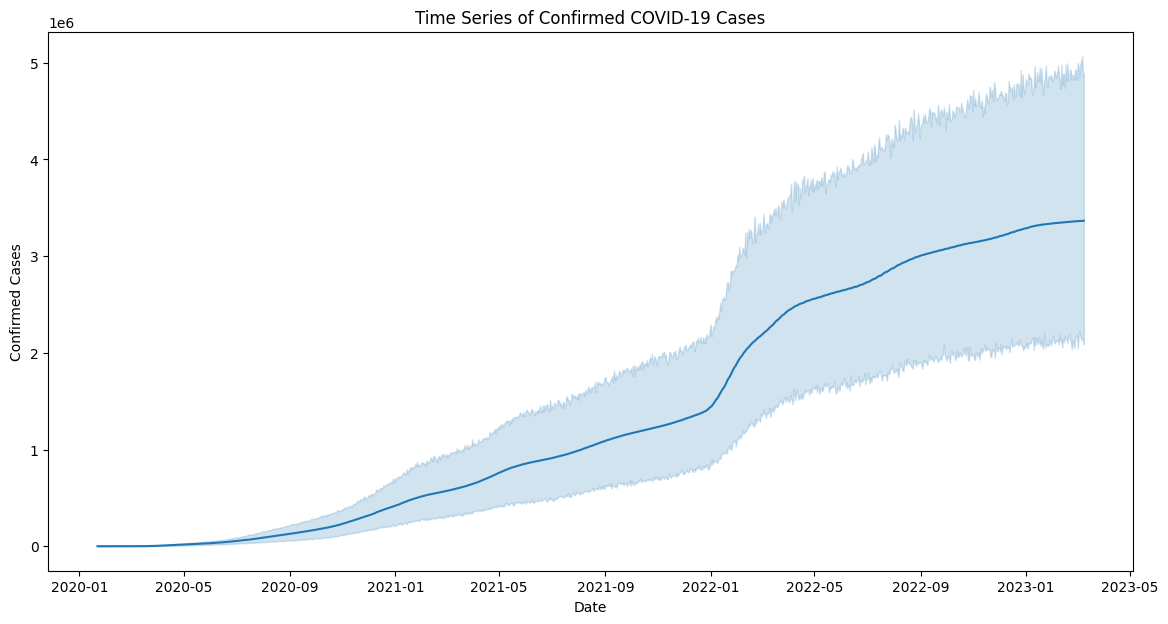

In [49]:
# Plotting time series of confirmed cases
plt.figure(figsize=(14, 7))
sns.lineplot(data=covid_data, x=covid_data.index, y='Confirmed')
plt.title('Time Series of Confirmed COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.show()


In [50]:
app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

app.layout = dbc.Container([
    dbc.Row(dbc.Col(html.H1("COVID-19 Dashboard", className="text-center mt-4"))),

    dbc.Row([
        dbc.Col(dcc.Graph(id='geo-map'), width=12)
    ]),

    dbc.Row([
        dbc.Col(dcc.Graph(id='time-series'), width=12)
    ]),

    dbc.Row([
        dbc.Col(dcc.Dropdown(
            id='country-dropdown',
            options=[{'label': country, 'value': country} for country in covid_data['Country'].unique()],
            value='United States',
            multi=False,
            style={'width': '50%'}
        ), width=6),
    ]),

    dbc.Row([
        dbc.Col(dcc.Graph(id='country-time-series'), width=12)
    ]),

    dcc.Interval(id='interval-component', interval=1*1000, n_intervals=0)
])

@app.callback(
    Output('geo-map', 'figure'),
    Input('interval-component', 'n_intervals')
)
def update_map(n):
    fig = px.scatter_geo(country_data, lat='Lat', lon='Long', hover_name='Country',
                         size='Confirmed', color='Confirmed',
                         projection='natural earth',
                         title='Total Confirmed COVID-19 Cases by Country')
    return fig

@app.callback(
    Output('time-series', 'figure'),
    Input('interval-component', 'n_intervals')
)
def update_time_series(n):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=covid_data.index, y=covid_data['Confirmed'], mode='lines', name='Confirmed Cases'))
    fig.update_layout(title='Time Series of Confirmed COVID-19 Cases', xaxis_title='Date', yaxis_title='Confirmed Cases')
    return fig

@app.callback(
    Output('country-time-series', 'figure'),
    [Input('country-dropdown', 'value')]
)
def update_country_time_series(selected_country):
    country_specific_data = covid_data[covid_data['Country'] == selected_country]
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=country_specific_data.index, y=country_specific_data['Confirmed'], mode='lines', name='Confirmed Cases'))
    fig.update_layout(title=f'Time Series of Confirmed COVID-19 Cases in {selected_country}', xaxis_title='Date', yaxis_title='Confirmed Cases')
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>